In [78]:
import pandas as pd

# Load the dataset
df = pd.read_csv("job_applicant_dataset.csv")

# Show the first 5 rows
df.head()

,Job Applicant Name,Age,Gender,Race,Ethnicity,Resume,Job Roles,Job Description,Best Match
0,Daisuke Mori,29,Male,Mongoloid/Asian,Vietnamese,"Proficient in Injury Prevention, Motivation, N...",Fitness Coach,A Fitness Coach is responsible for helping cl...,0
1,Taichi Shimizu,31,Male,Mongoloid/Asian,Filipino,"Proficient in Healthcare, Pharmacology, Medica...",Physician,"Diagnose and treat illnesses, prescribe medica...",0
2,Sarah Martin,46,Female,White/Caucasian,Dutch,"Proficient in Forecasting, Financial Modelling...",Financial Analyst,"As a Financial Analyst, you will be responsibl...",0
3,Keith Hughes,43,Male,Negroid/Black,Caribbean,"Proficient in Budgeting, Supply Chain Optimiza...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1
4,James Davis,49,Male,White/Caucasian,English,"Proficient in Logistics, Negotiation, Procurem...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Applicant Name  10000 non-null  object
 1   Age                 10000 non-null  int64 
 2   Gender              10000 non-null  object
 3   Race                10000 non-null  object
 4   Ethnicity           10000 non-null  object
 5   Resume              10000 non-null  object
 6   Job Roles           10000 non-null  object
 7   Job Description     10000 non-null  object
 8   Best Match          10000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


In [3]:
df.isnull().sum()

Job Applicant Name    0
Age                   0
Gender                0
Race                  0
Ethnicity             0
Resume                0
Job Roles             0
Job Description       0
Best Match            0
dtype: int64

In [4]:
df.groupby('Gender')['Best Match'].mean()
#This tells the percentage of applicants selected (Best Match = 1) for each gender.

Gender
Female    0.354382
Male      0.612572
Name: Best Match, dtype: float64

In [5]:
# Calculate selection rates
def get_selection_rate(df, gender):
    return df[df['Gender'] == gender]['Best Match'].mean()

rate_female = get_selection_rate(df, 'Female')
rate_male = get_selection_rate(df, 'Male')
dir_gender = round(rate_female / rate_male, 2) if rate_male > 0 else 0

print(f"Disparate Impact Ratio (Female vs Male): {dir_gender}")

Disparate Impact Ratio (Female vs Male): 0.58


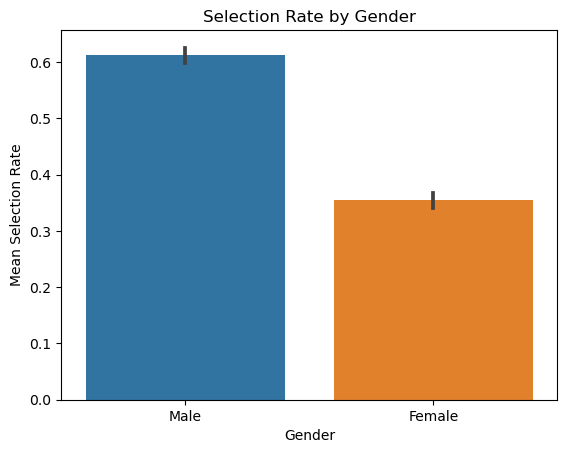

In [6]:
# As DIR is 0.58<0.8. It would be considered potentially biased 
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Gender', y='Best Match', data=df)
plt.title('Selection Rate by Gender')
plt.ylabel('Mean Selection Rate')
plt.show()


In [7]:
# Find the min and max age
min_age, max_age = df['Age'].min(), df['Age'].max()
print(f"Minimum Age: {min_age}\nMaximum Age: {max_age}")

Minimum Age: 25
Maximum Age: 55


In [8]:
# Create age bins (10-year intervals)
bins = [25, 35, 45, 56]
labels = ['25-34', '35-44', '45-55']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['AgeGroup'].value_counts().sort_index()

AgeGroup
25-34    3194
35-44    3248
45-55    3558
Name: count, dtype: int64

In [9]:
# Group by age range and calculate mean of 'Best Match'
selection_rates_age = df.groupby('AgeGroup')['Best Match'].mean()
print(selection_rates_age)

AgeGroup
25-34    0.482780
35-44    0.477525
45-55    0.493817
Name: Best Match, dtype: float64


In [10]:
min_max_ratio = (selection_rates_age.min() / selection_rates_age.max()) if selection_rates_age.max() > 0 else 0
print(f"Min/Max Selection Rate Ratio: {min_max_ratio:.3f}")

Min/Max Selection Rate Ratio: 0.967


In [11]:
print(f"Standard Deviation of Selection Rates: {selection_rates_age.std():.4f}")

Standard Deviation of Selection Rates: 0.0083


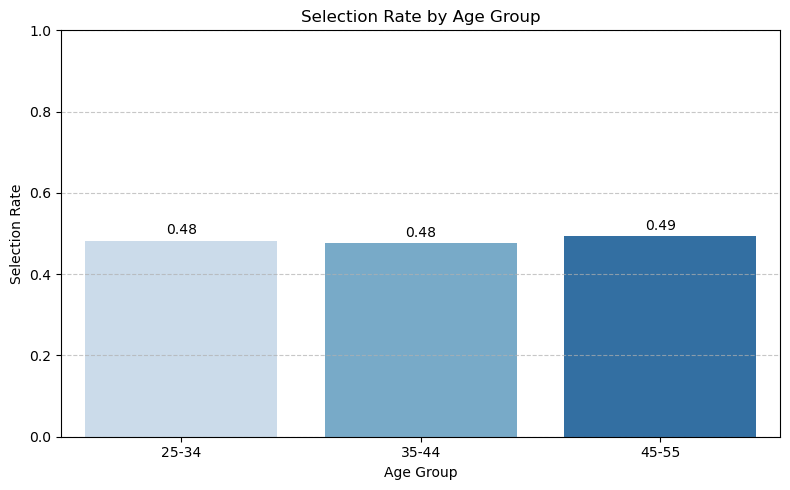

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=selection_rates_age.index, y=selection_rates_age.values, palette="Blues")
plt.title("Selection Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Selection Rate")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.015, f"{bar.get_height():.2f}", 
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [21]:
# "We grouped applicants into three age categories (25–34, 35–44, and 45–55) and analyzed the selection rates (Best Match = 1).
# The rates were 48.3%, 47.8%, and 49.4%, respectively.

# The Min/Max selection rate ratio was 0.97, and the standard deviation was just 0.0065, indicating no significant age-related disparity.
# Thus, we can conclude that the shortlisting process in this dataset is likely age-neutral within this range.” 

In [13]:
# Section 1: Types of Races
print("Types of Races in the Dataset:", df['Race'].unique())

Types of Races in the Dataset: ['Mongoloid/Asian' 'White/Caucasian' 'Negroid/Black']


In [14]:
df.groupby('Race')['Best Match'].mean()

Race
Mongoloid/Asian    0.488227
Negroid/Black      0.485852
White/Caucasian    0.480891
Name: Best Match, dtype: float64

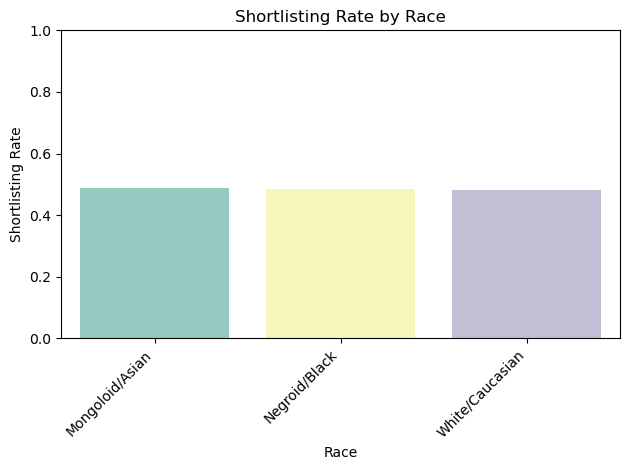

In [15]:
if {'Race', 'Best Match'}.issubset(df.columns):
    import matplotlib.pyplot as plt
    import seaborn as sns

    rates = df.groupby('Race')['Best Match'].mean().reset_index()
    sns.barplot(data=rates, x='Race', y='Best Match', palette='Set3')
    plt.title('Shortlisting Rate by Race')
    plt.xlabel('Race')
    plt.ylabel('Shortlisting Rate')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns missing.")

In [16]:
# Section 1: Types of Ethnicities
print("Types of Ethnicities:", df['Ethnicity'].unique())

Types of Ethnicities: ['Vietnamese' 'Filipino' 'Dutch' 'Caribbean' 'English' 'African' 'Thai'
 'French' 'Indian' 'Ethiopian' 'Korean' 'Irish' 'Kenyan' 'Italian'
 'Polish' 'Jamaican' 'Chinese' 'German' 'Nigerian' 'Japanese' 'Ghanaian']


In [17]:
# Section 2: Shortlisting Rates by Ethnicity
df.groupby('Ethnicity')['Best Match'].mean()

Ethnicity
African       0.485772
Caribbean     0.495781
Chinese       0.456914
Dutch         0.484076
English       0.455102
Ethiopian     0.472527
Filipino      0.470238
French        0.461864
German        0.479482
Ghanaian      0.463265
Indian        0.510917
Irish         0.503030
Italian       0.485714
Jamaican      0.525974
Japanese      0.468880
Kenyan        0.468560
Korean        0.500000
Nigerian      0.491228
Polish        0.496855
Thai          0.488789
Vietnamese    0.523715
Name: Best Match, dtype: float64

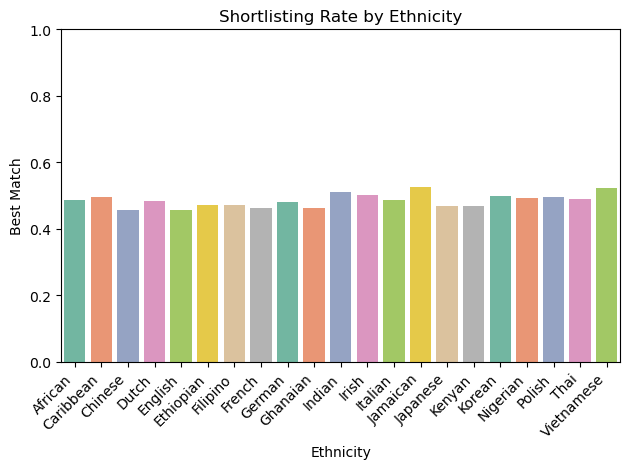

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

rates = df.groupby('Ethnicity')['Best Match'].mean().reset_index()
sns.barplot(data=rates, x='Ethnicity', y='Best Match', palette='Set2')
plt.title('Shortlisting Rate by Ethnicity')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from scipy.sparse import hstack

df = pd.read_csv("job_applicant_dataset.csv")

# Encode categorical features
for col in ['Gender', 'Race', 'Ethnicity']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Combine text columns
df['Text'] = df['Resume'].fillna('') + ' ' + df['Job Description'].fillna('')

# Vectorize text and combine with structured data
X_text = TfidfVectorizer(stop_words='english', max_features=300).fit_transform(df['Text'])
X_struct = df[['Age', 'Gender', 'Race', 'Ethnicity']].values
X = hstack([X_text, X_struct])

y = df['Best Match'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6510
Precision: 0.6422
Recall: 0.6448
F1 Score: 0.6435

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      1023
           1       0.64      0.64      0.64       977

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000

Confusion Matrix:
 [[672 351]
 [347 630]]


In [20]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def group_metrics(y_true, y_pred, attr):
    groups = np.unique(attr)
    selection_rates = {}
    tprs = {}
    fprs = {}

    for g in groups:
        mask = (attr == g)
        y_true_g = y_true[mask]
        y_pred_g = y_pred[mask]

        selection_rates[g] = y_pred_g.mean()

        pos_mask = (y_true_g == 1)
        neg_mask = (y_true_g == 0)

        tprs[g] = (y_pred_g[pos_mask] == 1).mean() if pos_mask.any() else np.nan
        fprs[g] = (y_pred_g[neg_mask] == 1).mean() if neg_mask.any() else np.nan

    dp_diff = abs(selection_rates[groups[0]] - selection_rates[groups[1]]) if len(groups) == 2 else None
    diratio = min(selection_rates.values()) / max(selection_rates.values()) if len(groups) == 2 else None
    tpr_diff = max(tprs.values()) - min(tprs.values()) if len(tprs) > 1 else None
    fpr_diff = max(fprs.values()) - min(fprs.values()) if len(fprs) > 1 else None

    return selection_rates, dp_diff, diratio, tprs, fprs, tpr_diff, fpr_diff

def evaluate_fairness_all_attributes(y_true, y_pred, df_test, sensitive_columns):
    print(f"Overall Accuracy: {accuracy_score(y_true, y_pred):.3f}\n")

    for attr in sensitive_columns:
        print(f"---  Fairness Metrics for Sensitive Attribute: {attr} ---")
        sensitive_attr = df_test[attr].values
        sel, dp_diff, diratio, tprs, fprs, tpr_diff, fpr_diff = group_metrics(y_true, y_pred, sensitive_attr)

        print(" Selection Rates by Group:")
        for group, rate in sel.items():
            print(f"  {group}: {rate:.3f}")

        if dp_diff is not None:
            print(f" Demographic Parity Difference: {dp_diff:.3f}")
            print(f" Disparate Impact Ratio: {diratio:.3f}")

        print(" True Positive Rates by Group:")
        for group, rate in tprs.items():
            print(f"  {group}: {rate:.3f}")

        print(" False Positive Rates by Group:")
        for group, rate in fprs.items():
            print(f"  {group}: {rate:.3f}")

        if tpr_diff is not None and fpr_diff is not None:
            print(f" Equalized Odds TPR Difference: {tpr_diff:.3f}")
            print(f" Equalized Odds FPR Difference: {fpr_diff:.3f}\n")

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
evaluate_fairness_all_attributes(y_test, y_pred, df_test, ['Gender', 'Race'])

Overall Accuracy: 0.651

---  Fairness Metrics for Sensitive Attribute: Gender ---
 Selection Rates by Group:
  0: 0.003
  1: 0.949
 Demographic Parity Difference: 0.945
 Disparate Impact Ratio: 0.003
 True Positive Rates by Group:
  0: 0.009
  1: 0.989
 False Positive Rates by Group:
  0: 0.000
  1: 0.884
 Equalized Odds TPR Difference: 0.980
 Equalized Odds FPR Difference: 0.884

---  Fairness Metrics for Sensitive Attribute: Race ---
 Selection Rates by Group:
  0: 0.500
  1: 0.491
  2: 0.481
 True Positive Rates by Group:
  0: 0.667
  1: 0.646
  2: 0.621
 False Positive Rates by Group:
  0: 0.335
  1: 0.334
  2: 0.358
 Equalized Odds TPR Difference: 0.046
 Equalized Odds FPR Difference: 0.024



In [21]:
!pip install aif360
!pip install fairlearn

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Load and preprocess data
df = pd.read_csv("job_applicant_dataset.csv")
df[["Gender", "Race", "Ethnicity"]] = df[["Gender", "Race", "Ethnicity"]].apply(LabelEncoder().fit_transform)
text = df["Resume"].fillna("") + " " + df["Job Description"].fillna("")
X_text = TfidfVectorizer(stop_words="english", max_features=300).fit_transform(text)
X = hstack([X_text, df[["Age", "Gender", "Race", "Ethnicity"]].values])

# Labels and sensitive attribute
y, A = df["Best Match"].values, df["Gender"].values

# Train-test split
X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, y, A, test_size=0.2, random_state=42)

# Dense versions for Fairlearn
X_train_dense, X_test_dense = X_train.toarray(), X_test.toarray()


In [80]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Joint and marginal distributions
groups, labels = np.unique(A_train), np.unique(y_train)
P_y_a = {(y, g): np.mean((y_train == y) & (A_train == g)) for y in labels for g in groups}
P_y = {y: np.mean(y_train == y) for y in labels}
P_a = {g: np.mean(A_train == g) for g in groups}

# Sample weights for reweighing
weights = np.array([(P_y[y] * P_a[a]) / max(P_y_a[(y, a)], 1e-6) for y, a in zip(y_train, A_train)])

# Train and predict
clf = LogisticRegression(max_iter=1000).fit(X_train_dense, y_train, sample_weight=weights)
y_pred = clf.predict(X_test_dense)
acc = accuracy_score(y_test, y_pred)
print("Accuracy (Reweighing):", acc)

# Fairness metrics
df = pd.DataFrame({"actual": y_test, "pred": y_pred, "Gender": A_test})
grouped = df.groupby("Gender").apply(
    lambda g: pd.Series({
        "accuracy": accuracy_score(g["actual"], g["pred"]),
        "selection_rate": g["pred"].mean()
    })
)
disp = abs(grouped["selection_rate"].max() - grouped["selection_rate"].min())

# Output
print("\nReweighing Metrics by Gender:")
print(grouped)
print(f"Overall Accuracy: {acc:.2f}")
print(f"Selection Rate Disparity: {disp:.6f}")


Accuracy (Reweighing): 0.535

Reweighing Metrics by Gender:
        accuracy  selection_rate
Gender                          
0       0.515996        0.464396
1       0.552861        0.567410
Overall Accuracy: 0.54
Selection Rate Disparity: 0.103014


In [82]:
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Train fair classifier using Exponentiated Gradient
eg_model = ExponentiatedGradient(
    LogisticRegression(solver='liblinear', max_iter=1000),
    EqualizedOdds(),
    eps=0.01,
    max_iter=1000
)
eg_model.fit(X_train_dense, y_train, sensitive_features=A_train)
y_pred = eg_model.predict(X_test_dense)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy (In-processing EG):", acc)

# Fairness metrics by gender
df = pd.DataFrame({"actual": y_test, "pred": y_pred, "Gender": A_test})
grouped = df.groupby("Gender").apply(lambda g: pd.Series({
    "accuracy": accuracy_score(g["actual"], g["pred"]),
    "selection_rate": g["pred"].mean()
}))
disp = abs(grouped["selection_rate"].max() - grouped["selection_rate"].min())

# Output
print("\nExponentiated Gradient (In-processing) Metrics by Gender:")
print(grouped)
print(f"Overall Accuracy: {acc:.2f}")
print(f"Selection Rate Disparity: {disp:.6f}")


Accuracy (In-processing EG): 0.5285

Exponentiated Gradient (In-processing) Metrics by Gender:
        accuracy  selection_rate
Gender                          
0       0.540764        0.452012
1       0.516974        0.527643
Overall Accuracy: 0.53
Selection Rate Disparity: 0.075631


In [83]:
from fairlearn.postprocessing import ThresholdOptimizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Split training set into subtrain and validation
X_sub, X_val, y_sub, y_val, A_sub, A_val = train_test_split(
    X_train_dense, y_train, A_train, test_size=0.25, random_state=42, stratify=y_train
)

# Train base model
base_model = LogisticRegression(solver="liblinear", max_iter=1000).fit(X_sub, y_sub)

# Fit fairness post-processor on validation set
postproc = ThresholdOptimizer(
    estimator=base_model,
    constraints="equalized_odds",
    prefit=True
)
postproc.fit(X_val, y_val, sensitive_features=A_val)

# Predict on test set
y_pred = postproc.predict(X_test_dense, sensitive_features=A_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy (Post‑processing TO):", acc)

# Fairness metrics
df = pd.DataFrame({"actual": y_test, "pred": y_pred, "Gender": A_test})
grouped = df.groupby("Gender").apply(lambda g: pd.Series({
    "accuracy": accuracy_score(g["actual"], g["pred"]),
    "selection_rate": g["pred"].mean()
}))
disp = abs(grouped["selection_rate"].diff().iloc[-1])

# Output
print("\nThresholdOptimizer (Post-processing) Metrics by Gender:")
print(grouped)
print(f"Overall Accuracy: {acc:.2f}")
print(f"Selection Rate Disparity: {disp:.6f}")

Accuracy (Post‑processing TO): 0.5235

ThresholdOptimizer (Post-processing) Metrics by Gender:
        accuracy  selection_rate
Gender                          
0       0.601651        0.174407
1       0.450048        0.181377
Overall Accuracy: 0.52
Selection Rate Disparity: 0.006971
